<a href="https://colab.research.google.com/github/CeciliaHelen/Case-FortBrasil/blob/main/Case_Stone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Case Stone - Vaga de Dados

## Coluna	Descrição - cases:

accountid:	Chave primária da tabela

date_ref:	Data do chamado

channelid:	Canal do chamado (chat = 1; telefone = 2; e-mail = 3)

waitingtime:	Tempo de espera para atendimento (segundos)

missed:	Flag de chamado atendido

pesquisa_de_satisfa_o: c	Flag de pesquisa de 
satisfação preenchida

assunto:	Assunto do chamado

Id:	Chave da tabela




## Coluna Descrição - creds:
cred_date:	Data de credenciamento

shipping_address_city:	Endereço de entrega – cidade

shipping_address_state:	Endereço de entrega – estado

max_machine:	Produto adquirido

accountid:	Chave secundária da tabela



### Questão 01

Foi implementada no dia 1 de agosto uma funcionalidade nova no site do Ton que acredita que irá **diminuir** a quantidade de **chamados recebidos**. Avalie se a implementação teve um impacto estatisticamente relevante.

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns

In [26]:
df_cases = pd.read_csv('cases.csv')
df_cases.drop('Unnamed: 0', axis=1, inplace=True)
df_cases

,accountid,date_ref,channelid,waitingtime,missed,pesquisa_de_satisfa_o__c,assunto,Id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Aplicativo:Dúvidas funcionalidades App:Primeir...,0013j00002z0CeEAAU
...,...,...,...,...,...,...,...,...
29728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29729,0013j00002zfMo3AAE,2020-09-15,2.0,2.0,False,NaN,Produto:Pinpad:Dúvidas pinpad,0013j00002zfMo3AAE
29730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29731,0013j00002zh888AAA,2020-09-28,2.0,4.0,False,NaN,Logística:OS:Ineficiência,0013j00002zh888AAA


In [27]:
#Dimensões da tabela
df_cases.shape

(29733, 8)

In [28]:
#Descrição das informações da tabela
df_cases.describe()

,channelid,waitingtime
count,17982.0,17982.000000
mean,2.0,17.710822
std,0.0,85.636650
min,2.0,0.000000
25%,2.0,6.000000
50%,2.0,9.000000
75%,2.0,14.000000
max,2.0,7993.000000


In [29]:
#Percentual de nulos
df_cases.isnull().sum()
#/29733*100

accountid                   11751
date_ref                    11751
channelid                   11751
waitingtime                 11751
missed                      11751
pesquisa_de_satisfa_o__c    27005
assunto                     11751
Id                          11751
dtype: int64

In [30]:
#Percentual de faltantes
df_cases.isna().sum()
#/29733*100

accountid                   11751
date_ref                    11751
channelid                   11751
waitingtime                 11751
missed                      11751
pesquisa_de_satisfa_o__c    27005
assunto                     11751
Id                          11751
dtype: int64

In [31]:
#Visão dos tipos de dados das colunas
df_cases.dtypes

accountid                    object
date_ref                     object
channelid                   float64
waitingtime                 float64
missed                       object
pesquisa_de_satisfa_o__c     object
assunto                      object
Id                           object
dtype: object

In [32]:
#Separação da tabela por tipos de dados para tratamento dos nulos e faltantes
col_numeric = df_cases.select_dtypes(['int64','float64']).columns
col_categorical = df_cases.select_dtypes(['object']).columns

In [33]:
#Conferindo quais colunas são numéricas e quais são categóricas
print(f"Numeric: {col_numeric}", f"\nCategorical: {col_categorical}")

Numeric: Index(['channelid', 'waitingtime'], dtype='object') 
Categorical: Index(['accountid', 'date_ref', 'missed', 'pesquisa_de_satisfa_o__c',
       'assunto', 'Id'],
      dtype='object')


In [34]:
#Separando as tabelas numéricas e categóricas que possuem nulos
col_numeric_null = list(df_cases.loc[:, col_numeric].isnull().sum()[df_cases.loc[:, col_numeric].isnull().sum() > 0].index)
col_categorical_null = list(df_cases.loc[:, col_categorical].isnull().sum()[df_cases.loc[:, col_categorical].isnull().sum() > 0].index)

In [35]:
#Conferindo quais colunas numéricas e categóricas possuem nulos
print(f"Numeric Null: {col_numeric_null}", f"\nCategorical Null{col_categorical_null}")

Numeric Null: ['channelid', 'waitingtime'] 
Categorical Null['accountid', 'date_ref', 'missed', 'pesquisa_de_satisfa_o__c', 'assunto', 'Id']


In [36]:
#Substituindo os valores nulos das colunas numéricas por zero
for num in col_numeric_null:
  df_cases.loc[:, num] = df_cases.loc[:, num].fillna(0)

In [37]:
#Substituindo os valores nulos das colunas numéricas por "0000-00-00", pois usaremos esse formato para modificar o "date_ref"
pesquisa = "SEM REGISTRO"

df_cases.pesquisa_de_satisfa_o__c = df_cases.pesquisa_de_satisfa_o__c.fillna(pesquisa)

df_cases=df_cases.dropna(axis=0, how='any')
df_cases

,accountid,date_ref,channelid,waitingtime,missed,pesquisa_de_satisfa_o__c,assunto,Id
4,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,SEM REGISTRO,Aplicativo:Dúvidas funcionalidades App:Primeir...,0013j00002z0CeEAAU
5,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,SEM REGISTRO,Produto:S920:Ativação,0013j00002z0CeEAAU
6,0013j00002z0CeEAAU,2020-09-23,2.0,1.0,False,SEM REGISTRO,Produto:Cartão pré-pago:Dúvidas,0013j00002z0CeEAAU
7,0013j00002zQgldAAC,2020-08-29,2.0,6.0,False,SEM REGISTRO,Logística:Envio de Cartão:Tracking,0013j00002zQgldAAC
8,0013j00002zQgldAAC,2020-08-29,2.0,6.0,False,SEM REGISTRO,Pedido:Cancelamento:Outros,0013j00002zQgldAAC
...,...,...,...,...,...,...,...,...
29724,0013j00002uDTRyAAO,2020-10-13,2.0,4.0,False,SEM REGISTRO,Produto:Pinpad:Dúvidas pinpad,0013j00002uDTRyAAO
29725,0013j00002uDTRyAAO,2020-10-13,2.0,4.0,False,SEM REGISTRO,Produto:Pinpad:Pareamento,0013j00002uDTRyAAO
29729,0013j00002zfMo3AAE,2020-09-15,2.0,2.0,False,SEM REGISTRO,Produto:Pinpad:Dúvidas pinpad,0013j00002zfMo3AAE
29731,0013j00002zh888AAA,2020-09-28,2.0,4.0,False,SEM REGISTRO,Logística:OS:Ineficiência,0013j00002zh888AAA


In [38]:
#Percentual de nulos
df_cases.isnull().sum()/29733*100

accountid                   0.0
date_ref                    0.0
channelid                   0.0
waitingtime                 0.0
missed                      0.0
pesquisa_de_satisfa_o__c    0.0
assunto                     0.0
Id                          0.0
dtype: float64

In [39]:
#Modifica a coluna "date_ref" para exibir apenas o ano-mês como comparativo de melhoria ou não ao longo dos meses do novo sistema implementado
df_cases['date_ref_group'] = df_cases.date_ref.apply(lambda x : x[:-3])
df_cases

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,accountid,date_ref,channelid,waitingtime,missed,pesquisa_de_satisfa_o__c,assunto,Id,date_ref_group
4,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,SEM REGISTRO,Aplicativo:Dúvidas funcionalidades App:Primeir...,0013j00002z0CeEAAU,2020-07
5,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,SEM REGISTRO,Produto:S920:Ativação,0013j00002z0CeEAAU,2020-07
6,0013j00002z0CeEAAU,2020-09-23,2.0,1.0,False,SEM REGISTRO,Produto:Cartão pré-pago:Dúvidas,0013j00002z0CeEAAU,2020-09
7,0013j00002zQgldAAC,2020-08-29,2.0,6.0,False,SEM REGISTRO,Logística:Envio de Cartão:Tracking,0013j00002zQgldAAC,2020-08
8,0013j00002zQgldAAC,2020-08-29,2.0,6.0,False,SEM REGISTRO,Pedido:Cancelamento:Outros,0013j00002zQgldAAC,2020-08
...,...,...,...,...,...,...,...,...,...
29724,0013j00002uDTRyAAO,2020-10-13,2.0,4.0,False,SEM REGISTRO,Produto:Pinpad:Dúvidas pinpad,0013j00002uDTRyAAO,2020-10
29725,0013j00002uDTRyAAO,2020-10-13,2.0,4.0,False,SEM REGISTRO,Produto:Pinpad:Pareamento,0013j00002uDTRyAAO,2020-10
29729,0013j00002zfMo3AAE,2020-09-15,2.0,2.0,False,SEM REGISTRO,Produto:Pinpad:Dúvidas pinpad,0013j00002zfMo3AAE,2020-09
29731,0013j00002zh888AAA,2020-09-28,2.0,4.0,False,SEM REGISTRO,Logística:OS:Ineficiência,0013j00002zh888AAA,2020-09


In [40]:
df_cases.accountid.unique

<bound method Series.unique of 4        0013j00002z0CeEAAU
5        0013j00002z0CeEAAU
6        0013j00002z0CeEAAU
7        0013j00002zQgldAAC
8        0013j00002zQgldAAC
                ...        
29724    0013j00002uDTRyAAO
29725    0013j00002uDTRyAAO
29729    0013j00002zfMo3AAE
29731    0013j00002zh888AAA
29732    0013j00002zh888AAA
Name: accountid, Length: 17982, dtype: object>

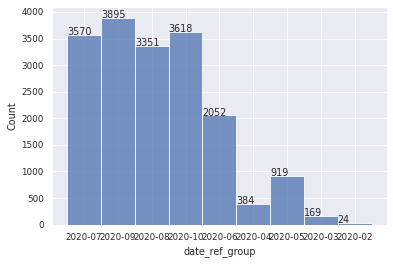

In [47]:
sns.set_theme()
sns.set_context("paper")
ax = sns.histplot(x = df_cases.date_ref_group)
#format_time_axis_example(ax)
#ax = sns.countplot(x = df_cases.date_ref_group, order = df_cases.date_ref_group.value_counts().index)
#ax = sns.catplot(x = df_cases.date_ref_group, kind='count', order = df_cases.date_ref_group) 

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height, height)

In [ ]:
asc = ['2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10']
order = df_cases['date_ref_group'].value_counts(ascending = asc).index
order

In [ ]:
#Análise descritiva
""" 
moda, a mediana, a média, a amplitude, a variância e o desvio padrão.
"""

In [ ]:
df_creds = pd.read_csv('creds.csv')
df_creds